# Importing Necessary Libraries

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns


In [2]:
tips = sns.load_dataset('tips')
X= tips[['total_bill', 'size']]
y= tips['tip']

In [9]:


# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Create a KNN regressor with k=5
knn = KNeighborsRegressor(n_neighbors=100)

#FIt the model to the training data 
knn.fit(X_train,y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)


# Evaluate the performance of the model using mean squared error
mean = mean_squared_error(y_test,y_pred)
print("Mean Squared Error = ",mean)


Mean Squared Error =  0.7300585424489799


In [10]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 100,
 'p': 2,
 'weights': 'uniform'}

In [5]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [17]:
# Import necessary libraries
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset using Seaborn
iris = sns.load_dataset("iris")

# Split the dataset into features (X) and target (y)
X = iris.drop('species', axis=1)
y = iris['species']

# Split the dataset into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNeighborsClassifier model with k=3 (you can adjust this hyperparameter)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print a classification report for more detailed evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [18]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

# How to find best number of n_neighbours

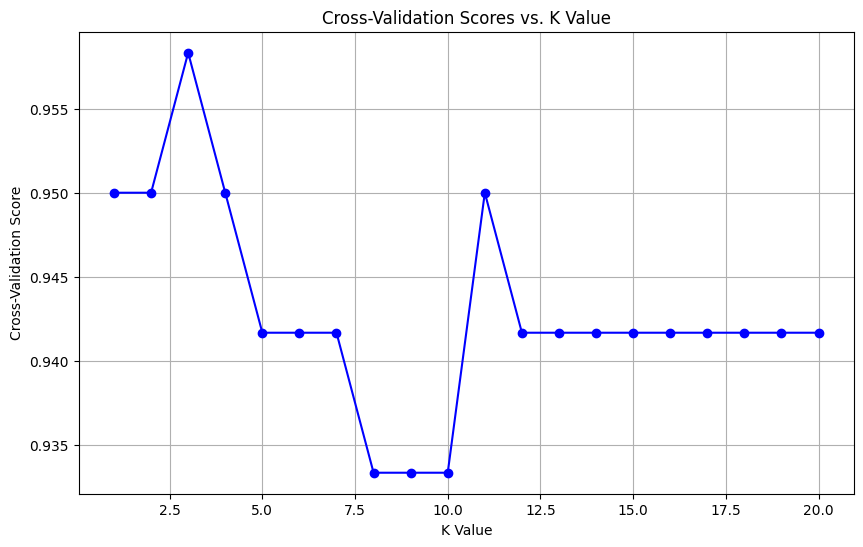

Best K Value: 3
Best Cross-Validation Score: 0.96
Accuracy on Test Set with Best K: 1.00


In [19]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset using Seaborn
iris = sns.load_dataset("iris")

# Split the dataset into features (X) and target (y)
X = iris.drop('species', axis=1)
y = iris['species']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to test
k_values = np.arange(1, 21)  # Testing k values from 1 to 20

# Create an empty list to store cross-validation scores
cross_val_scores = []

# Iterate through k values and perform cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # 5-fold cross-validation
    cross_val_scores.append(scores.mean())

# Find the best k value with the highest cross-validation score
best_k = k_values[np.argmax(cross_val_scores)]
best_score = max(cross_val_scores)

# Plot the cross-validation scores for different k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Score')
plt.grid(True)
plt.show()

print(f"Best K Value: {best_k}")
print(f"Best Cross-Validation Score: {best_score:.2f}")

# Train a KNN classifier with the best k value on the full training set
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the model on the test set
test_accuracy = best_knn.score(X_test, y_test)
print(f"Accuracy on Test Set with Best K: {test_accuracy:.2f}")


In [20]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

### Selection of Best Algorithm with parameters using GRID SEARCH CV

In [24]:
# Import necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset using Seaborn
iris = sns.load_dataset("iris")

# Split the dataset into features (X) and target (y)
X = iris.drop('species', axis=1)
y = iris['species']

# Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers and their associated hyperparameters to search
classifiers = [
    {
        'name': 'K-Nearest Neighbors',
        'classifier': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1, 3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'p': [1, 2],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Include algorithm as a hyperparameter
        }
    },
    {
        'name': 'Support Vector Classifier',
        'classifier': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly']
        }
    },
    {
        'name': 'Random Forest Classifier',
        'classifier': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    }
]

# Perform grid search with cross-validation for each classifier
best_models = []

for classifier in classifiers:
    clf = classifier['classifier']
    params = classifier['params']

    grid_search = GridSearchCV(clf, params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Train the best model on the full training set
    best_model = clf.set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    best_models.append({
        'name': classifier['name'],
        'best_params': best_params,
        'best_score': best_score,
        'test_accuracy': test_accuracy
    })

# Print the results
for model_info in best_models:
    print(f"Classifier: {model_info['name']}")
    print(f"Best Parameters: {model_info['best_params']}")
    print(f"Cross-Validation Score: {model_info['best_score']:.2f}")
    print(f"Test Set Accuracy: {model_info['test_accuracy']:.2f}\n")


Classifier: K-Nearest Neighbors
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Cross-Validation Score: 0.96
Test Set Accuracy: 1.00

Classifier: Support Vector Classifier
Best Parameters: {'C': 1, 'kernel': 'linear'}
Cross-Validation Score: 0.96
Test Set Accuracy: 1.00

Classifier: Random Forest Classifier
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation Score: 0.97
Test Set Accuracy: 1.00



# Printing the name of algorithm with best test accuracy

# 

In [25]:
# Initialize variables to keep track of the best model and accuracy
best_accuracy = 0
best_algorithm = None

# Perform grid search with cross-validation for each classifier
for classifier in classifiers:
    clf = classifier['classifier']
    params = classifier['params']

    grid_search = GridSearchCV(clf, params, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Train the best model on the full training set
    best_model = clf.set_params(**best_params)
    best_model.fit(X_train, y_train)

    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)

    # Check if this model has the best test accuracy so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_algorithm = classifier['name']

# Print the algorithm with the best test set accuracy
print(f"The algorithm with the best test set accuracy is: {best_algorithm} (Accuracy: {best_accuracy:.2f})")


The algorithm with the best test set accuracy is: K-Nearest Neighbors (Accuracy: 1.00)
